<a href="https://colab.research.google.com/github/Arpitkamal/Deep-learning-Sigmoid-Neuron/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt

$S_{w, b}(x) = \frac{1}{1+e^{-wx + b}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x + b)))

In [0]:
sigmoid(1, 0.5, 0)

0.6224593312018546

In [0]:
w = 0.9    # responsible for the shape 
b = 0.1    # if we increase b it will shift towards right side
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

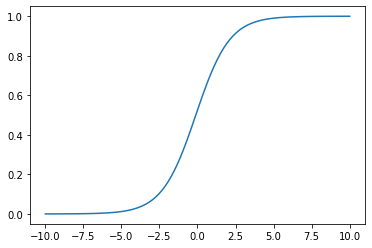

In [0]:
plt.plot(X,Y)
plt.show()

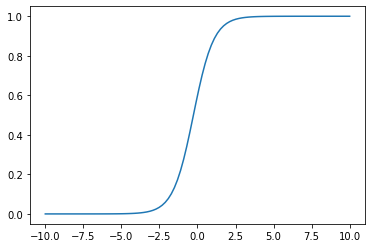

In [0]:
w = 1.5     #@param {type: "slider", min: -2, max: 2, step:0.1} 
b = 0.4     #@param {type: "slider", min: -2, max: 2, step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X,Y)
plt.show()

**W - Controlling the rate at which it falling from one extreme to another extreme**

**B - Controlling position of this fall w.r.t 0**

$S_{W_1,W_2,b}(x_1,x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [0]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d